# DSDBAL ASSIGNMENT NO. 5

### Data Visualization II


## 1. Importing all the required Python Libraries.

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset into pandas’ data frame.

In [69]:
df=pd.read_csv('titanic.csv',index_col="PassengerId")

In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 Dimensions of Dataset

In [71]:
df.shape

(891, 11)

Thus , the Titanic dataset contains total of 891 records and 11 attributes

In [72]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [73]:
df.isnull().sum()

# sns.lineplot(data=df)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age and Cabin have null values that must be handled

## 3.Data Preprocessing

### Handling Numerical Value {Imputing with Mean}

In [74]:
mean_age=df['Age'].mean()
df['Age']=df['Age'].fillna(mean_age)

In [75]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Handling Categorical Value {Imputing with Mode}

In [76]:
# mode_cab=df['Cabin'].mode()[0]
# df['Cabin']=df['Cabin'].fillna(mode_cab)
df['Cabin']=df['Cabin'].astype(str).str[0]
# df['Cabin']=df['Cabin'].fillna('U',inplace=True)
# df.drop(columns=['Cabin'],inplace=True)

In [77]:
mode_emb=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mode_emb)

In [78]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [79]:
df.shape

(891, 11)

In [80]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Visualisation

#### 1. Age vs. Survived, colored by Gender

Text(0, 0.5, 'Age')

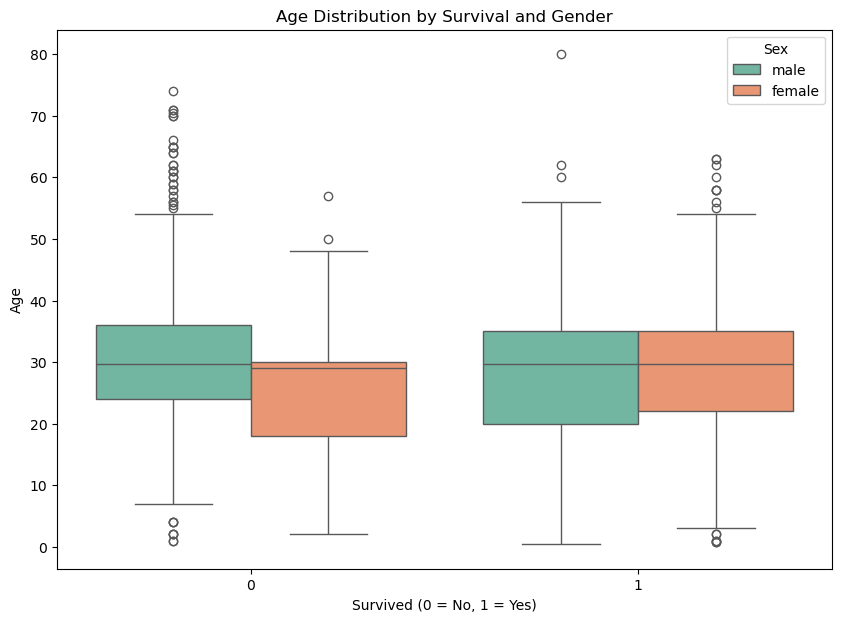

In [81]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Survived", y="Age", hue="Sex", data=df)
plt.title("Age Distribution by Survival and Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")


#### 2. Fare vs. Pclass, colored by Survived

Text(0, 0.5, 'Fare')

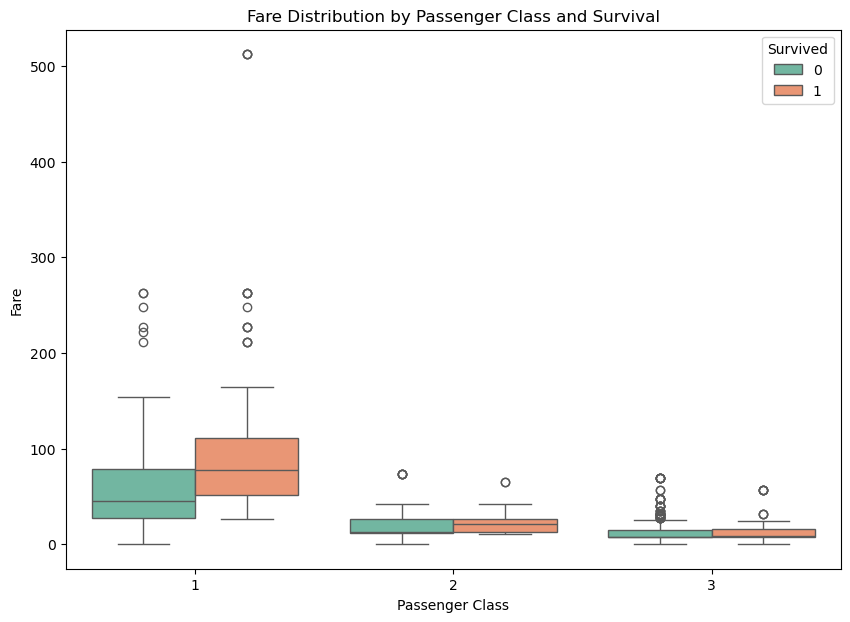

In [82]:

plt.figure(figsize=(10, 7))
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df)
plt.title("Fare Distribution by Passenger Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")


#### 3. Age vs. Pclass, colored by Survived

Text(0, 0.5, 'Age')

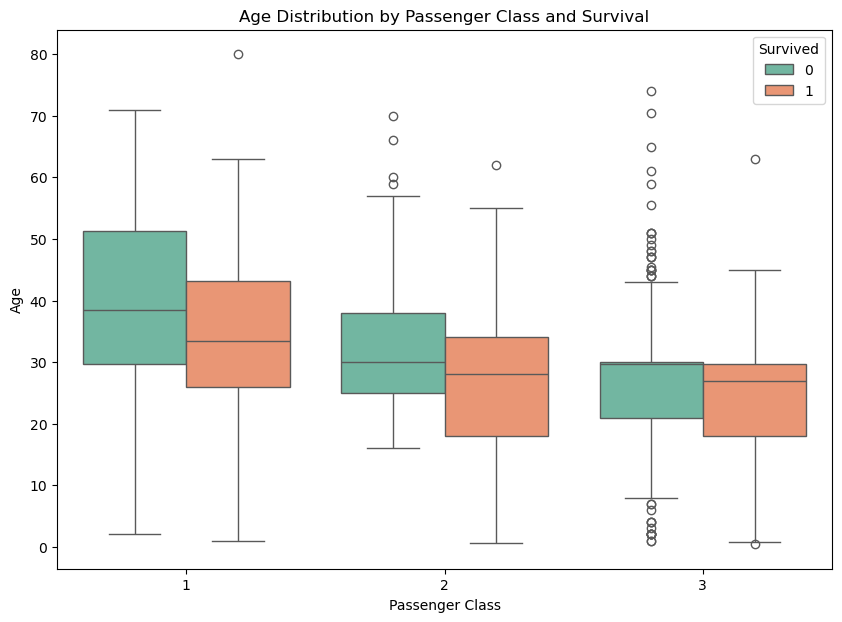

In [83]:

plt.figure(figsize=(10, 7))
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=df)
plt.title("Age Distribution by Passenger Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
